# Models Comparison for TinyML

In [1]:
# Load libraries
import numpy as np
from numpy import arange
import pickle

#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import sys
import seaborn as sbs

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)

## Change 'chosenIndex' to change the chosen Test (s/s3/s6)

In [4]:
dataXPath = ['../data/X.pkl', '../data/XS3.pkl', '../data/XS6.pkl']
dataYPath = ['../data/y.pkl', '../data/yS3.pkl', '../data/yS6.pkl']
choosenIndex = 2

with open(dataXPath[choosenIndex], 'rb') as f:
    X = pickle.load(f)

with open(dataYPath[choosenIndex], 'rb') as f:
    y = pickle.load(f)

In [5]:
print(np.unique(y))
labels = [str(el) for el in list(np.unique(y))]
print(labels)

[2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000]
['2000', '2100', '2200', '2300', '2400', '2500', '2600', '2700', '2800', '2900', '3000']


In [6]:
# Convert the labels in values like 0...n for the NN tests

labels = []
uniques = list(np.unique(y))

[labels.append(uniques.index(el)) for el in y]

y = np.array(labels)
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [8]:
print(X_test)

[[4285.7  4294.7  4306.07 4293.05 4286.88 4312.93 4301.12 4287.5  4284.17
  4290.04 4285.91 4269.82 4283.57 4264.58 4259.01 4268.87 4246.28 4241.
  4245.03 4236.4  4226.57 4236.02 4231.11 4218.93 4228.91 4229.2  4215.02
  4215.3  4214.23 4204.33 4204.88 4209.74]
 [4002.17 4015.39 4018.22 4015.45 4016.49 4028.62 4032.57 4026.54 4027.87
  4029.12 4038.97 4038.42 4029.67 4036.72 4036.27 4039.25 4029.92 4038.12
  4039.1  4041.64 4040.98 4042.86 4039.91 4048.86 4053.43 4053.   4054.18
  4053.5  4055.97 4057.14 4057.02 4063.76]
 [5257.57 5255.8  5257.39 5218.43 5261.56 5252.22 5241.1  5202.98 5263.5
  5186.01 5237.17 5252.8  5204.57 5229.22 5210.17 5241.79 5208.13 5210.38
  5218.85 5226.97 5264.2  5170.76 5247.67 5202.49 5187.13 5157.64 5175.31
  5161.65 5183.45 5260.1  5194.25 5213.14]
 [4651.56 4657.4  4666.16 4644.15 4662.31 4664.16 4654.97 4659.11 4669.47
  4650.75 4661.73 4665.12 4661.75 4659.81 4674.65 4656.95 4659.17 4670.53
  4666.99 4663.3  4676.72 4664.78 4666.05 4681.82 4683.45 46

In [73]:
print(y_test)

[ 5  5  6  7  8  9  5 10  8  0  0  6 10  4  6  6 10  0 10  5  3  9  6 10
  1  4  4  2  2  5  5  7 10  2  7  3  9  1  5  1  0  5  8  9  6  4  7  4
  1  8  6  3 10  5  8  2  3  7 10  0  7 10  7  3  2  2  8 10  8 10  0  0
  6  0  0  1  9  0  9  9  6 10  1 10  4  3  9  7  9  8  6  9  5  2  7  1
  5  8  9 10  7  1  5  8  6  4 10  2  0  4  2  3  1  7  9  9  0  1  6  6
  5  1  3  3  8 10  9  9  0  0  3  5  4  0  7  1  2  4  2  8  3  8  2  4
  9  3  5  4  1  7  4  0  7  6  9  6  4  3  3  8  0  8  8  3  3  4  5  3
  2  2  7  1  7  0  1  2  4  3  3  5  2  6  1  7  5  7 10 10  2  1  8  4
  0  5  4  7  9  6  4  0  5  6 10  3  2  2  6  6 10  4  1  8  7  8  8  9
  1  9  1  2]


## Model Spotting

In [9]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'f1_macro'


In [29]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.0001, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_estimators = 50)))


In [30]:
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,53 0,04
LR - 0,10 0,03
CART - 0,55 0,05
SVC - 0,61 0,04
RF - 0,64 0,04


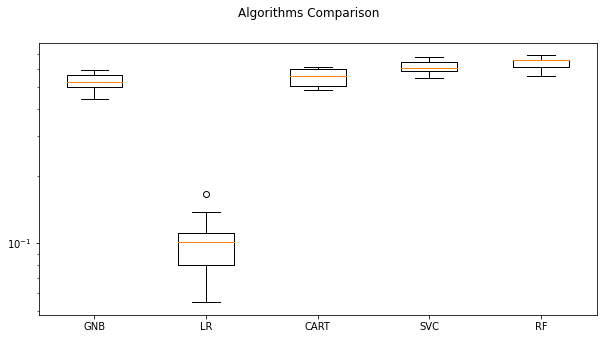

In [31]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_yscale('log')
ax.set_xticklabels(names)
plt.show()

# Valutazione dei modelli sul Test Set

In [32]:
tasks = ['S', 'S3', 'S6']
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = uniques[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[choosenIndex]+ '/classificationReports/'+'classification_report' + model_name +  '.csv', index = False)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       1.00      0.90      0.95        20
           2       0.18      0.10      0.13        20
           3       0.88      0.70      0.78        20
           4       0.37      0.50      0.43        20
           5       0.00      0.00      0.00        20
           6       0.79      0.95      0.86        20
           7       0.47      0.70      0.56        20
           8       0.54      0.70      0.61        20
           9       0.40      0.20      0.27        20
          10       0.50      0.75      0.60        20

    accuracy                           0.59       220
   macro avg       0.53      0.59      0.55       220
weighted avg       0.53      0.59      0.55       220

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.21      0.15      0.18    

# Neural Network

In [70]:
def getNetwork(): 
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    learn_rate = 0.001
    opt = Adam(learning_rate=learn_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# Cross-Validation NN

In [ ]:
EPOCHS = 500
BATCH_SIZE = 8
num_folds = 10


kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_train = scaler.fit_transform(X_cross_train)
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    X_cross_test = scaler.transform(X_cross_test)
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

# Train and Test

In [71]:
EPOCHS = 1000
BATCH_SIZE = 32

model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
report = classification_report(y_test, pred)
classification_report_csv(report, "NN")
print(report)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_74 (Dense)             (None, 11)                5643      
Total params: 23,595
Trainable params: 23,595
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
21/21 [==============================] - 0s 3ms/step - loss: 539.1151 - accuracy: 0.1076 - val_loss: 315.2131 - val_accuracy: 0.0864
Epoch 2/1000
21/21 [==============================] - 0s 1ms/step - loss: 190.4827 - accuracy: 0.0939 - val_loss: 119.6305 - val_accuracy: 0.1045
Epoch 3/1000
21/21 [==============================] - 0s 1ms/step - loss: 81.0722 - acc

Epoch 53/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2265 - accuracy: 0.2303 - val_loss: 3.1715 - val_accuracy: 0.1636
Epoch 54/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1267 - accuracy: 0.2485 - val_loss: 3.0652 - val_accuracy: 0.2227
Epoch 55/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0546 - accuracy: 0.2485 - val_loss: 2.9698 - val_accuracy: 0.2227
Epoch 56/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0197 - accuracy: 0.2697 - val_loss: 3.0451 - val_accuracy: 0.1455
Epoch 57/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0133 - accuracy: 0.2848 - val_loss: 3.0828 - val_accuracy: 0.1545
Epoch 58/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0477 - accuracy: 0.2545 - val_loss: 3.0075 - val_accuracy: 0.1818
Epoch 59/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0699 - accuracy: 0.2500 - val_loss: 3.1090 - val_accuracy: 0.1227

Epoch 167/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2395 - accuracy: 0.2303 - val_loss: 2.4432 - val_accuracy: 0.2500
Epoch 168/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1661 - accuracy: 0.2333 - val_loss: 2.5099 - val_accuracy: 0.1500
Epoch 169/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2308 - accuracy: 0.2061 - val_loss: 2.4412 - val_accuracy: 0.2136
Epoch 170/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1286 - accuracy: 0.2197 - val_loss: 2.4788 - val_accuracy: 0.1636
Epoch 171/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1216 - accuracy: 0.1848 - val_loss: 2.6034 - val_accuracy: 0.1500
Epoch 172/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3803 - accuracy: 0.1894 - val_loss: 2.5625 - val_accuracy: 0.1818
Epoch 173/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1649 - accuracy: 0.2303 - val_loss: 2.5390 - val_accuracy:

Epoch 224/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3488 - accuracy: 0.1530 - val_loss: 2.3496 - val_accuracy: 0.2364
Epoch 225/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2668 - accuracy: 0.1545 - val_loss: 2.2813 - val_accuracy: 0.2045
Epoch 226/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1496 - accuracy: 0.1894 - val_loss: 2.3582 - val_accuracy: 0.1091
Epoch 227/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2290 - accuracy: 0.1833 - val_loss: 2.3180 - val_accuracy: 0.2045
Epoch 228/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2202 - accuracy: 0.1955 - val_loss: 2.5784 - val_accuracy: 0.0955
Epoch 229/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2929 - accuracy: 0.1894 - val_loss: 2.3116 - val_accuracy: 0.1727
Epoch 230/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2171 - accuracy: 0.1894 - val_loss: 2.4001 - val_accuracy:

Epoch 281/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1295 - accuracy: 0.2333 - val_loss: 2.2628 - val_accuracy: 0.1545
Epoch 282/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1069 - accuracy: 0.2409 - val_loss: 2.2600 - val_accuracy: 0.2045
Epoch 283/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3376 - accuracy: 0.1955 - val_loss: 2.5351 - val_accuracy: 0.2273
Epoch 284/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2432 - accuracy: 0.2076 - val_loss: 2.2951 - val_accuracy: 0.1455
Epoch 285/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2241 - accuracy: 0.1985 - val_loss: 2.5897 - val_accuracy: 0.1182
Epoch 286/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.8141 - accuracy: 0.1303 - val_loss: 2.3168 - val_accuracy: 0.2091
Epoch 287/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2959 - accuracy: 0.1758 - val_loss: 2.3345 - val_accuracy:

Epoch 338/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1589 - accuracy: 0.2030 - val_loss: 2.2634 - val_accuracy: 0.1636
Epoch 339/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1870 - accuracy: 0.2045 - val_loss: 2.4989 - val_accuracy: 0.2000
Epoch 340/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1964 - accuracy: 0.2152 - val_loss: 2.2517 - val_accuracy: 0.1682
Epoch 341/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1351 - accuracy: 0.1985 - val_loss: 2.2473 - val_accuracy: 0.2000
Epoch 342/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2600 - accuracy: 0.1848 - val_loss: 2.2320 - val_accuracy: 0.1500
Epoch 343/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3510 - accuracy: 0.1803 - val_loss: 2.6621 - val_accuracy: 0.0864
Epoch 344/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3529 - accuracy: 0.1621 - val_loss: 2.4199 - val_accuracy:

Epoch 395/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3115 - accuracy: 0.1500 - val_loss: 2.2122 - val_accuracy: 0.1455
Epoch 396/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3474 - accuracy: 0.1455 - val_loss: 2.2497 - val_accuracy: 0.1727
Epoch 397/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3204 - accuracy: 0.1606 - val_loss: 2.2234 - val_accuracy: 0.1500
Epoch 398/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2856 - accuracy: 0.1485 - val_loss: 2.3445 - val_accuracy: 0.2000
Epoch 399/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3385 - accuracy: 0.1773 - val_loss: 2.2461 - val_accuracy: 0.1182
Epoch 400/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3076 - accuracy: 0.1561 - val_loss: 2.4245 - val_accuracy: 0.1000
Epoch 401/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3410 - accuracy: 0.1727 - val_loss: 2.2560 - val_accuracy:

Epoch 452/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3002 - accuracy: 0.1742 - val_loss: 2.2798 - val_accuracy: 0.1500
Epoch 453/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2389 - accuracy: 0.1758 - val_loss: 2.2219 - val_accuracy: 0.1955
Epoch 454/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2423 - accuracy: 0.2030 - val_loss: 2.3157 - val_accuracy: 0.2000
Epoch 455/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2861 - accuracy: 0.1606 - val_loss: 2.5804 - val_accuracy: 0.0727
Epoch 456/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3227 - accuracy: 0.1333 - val_loss: 2.2321 - val_accuracy: 0.2273
Epoch 457/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3111 - accuracy: 0.1712 - val_loss: 2.3988 - val_accuracy: 0.1955
Epoch 458/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.4104 - accuracy: 0.1212 - val_loss: 2.2944 - val_accuracy:

Epoch 509/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2613 - accuracy: 0.1667 - val_loss: 2.4207 - val_accuracy: 0.1591
Epoch 510/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3666 - accuracy: 0.1273 - val_loss: 2.5225 - val_accuracy: 0.1136
Epoch 511/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.4528 - accuracy: 0.1591 - val_loss: 2.4081 - val_accuracy: 0.1273
Epoch 512/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2877 - accuracy: 0.1606 - val_loss: 2.3098 - val_accuracy: 0.1545
Epoch 513/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2996 - accuracy: 0.1652 - val_loss: 2.3198 - val_accuracy: 0.1364
Epoch 514/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.3032 - accuracy: 0.1652 - val_loss: 2.4062 - val_accuracy: 0.1364
Epoch 515/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2458 - accuracy: 0.1955 - val_loss: 2.3219 - val_accuracy:

Epoch 566/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1838 - accuracy: 0.1833 - val_loss: 2.2176 - val_accuracy: 0.2227
Epoch 567/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1548 - accuracy: 0.2045 - val_loss: 2.1805 - val_accuracy: 0.1636
Epoch 568/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1730 - accuracy: 0.1742 - val_loss: 2.4096 - val_accuracy: 0.0682
Epoch 569/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.2291 - accuracy: 0.1652 - val_loss: 2.1066 - val_accuracy: 0.2955
Epoch 570/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1775 - accuracy: 0.2076 - val_loss: 2.1301 - val_accuracy: 0.1773
Epoch 571/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1187 - accuracy: 0.2076 - val_loss: 2.0904 - val_accuracy: 0.2000
Epoch 572/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1616 - accuracy: 0.2061 - val_loss: 2.1380 - val_accuracy:

Epoch 623/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0684 - accuracy: 0.2409 - val_loss: 2.1228 - val_accuracy: 0.1682
Epoch 624/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1386 - accuracy: 0.1909 - val_loss: 2.1071 - val_accuracy: 0.2227
Epoch 625/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.1390 - accuracy: 0.1803 - val_loss: 2.2688 - val_accuracy: 0.1773
Epoch 626/1000
21/21 [==============================] - 0s 986us/step - loss: 2.1815 - accuracy: 0.1864 - val_loss: 2.0542 - val_accuracy: 0.1682
Epoch 627/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0628 - accuracy: 0.2167 - val_loss: 2.1456 - val_accuracy: 0.1773
Epoch 628/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0957 - accuracy: 0.1758 - val_loss: 2.0607 - val_accuracy: 0.2773
Epoch 629/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0580 - accuracy: 0.2258 - val_loss: 2.1430 - val_accurac

Epoch 680/1000
21/21 [==============================] - 0s 1ms/step - loss: 2.0034 - accuracy: 0.2015 - val_loss: 1.8470 - val_accuracy: 0.3318
Epoch 681/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.9204 - accuracy: 0.2227 - val_loss: 1.8715 - val_accuracy: 0.2682
Epoch 682/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.8759 - accuracy: 0.2727 - val_loss: 1.8730 - val_accuracy: 0.3000
Epoch 683/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.8883 - accuracy: 0.2682 - val_loss: 1.8948 - val_accuracy: 0.2182
Epoch 684/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.9846 - accuracy: 0.2182 - val_loss: 2.0433 - val_accuracy: 0.1864
Epoch 685/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.9424 - accuracy: 0.2318 - val_loss: 1.9081 - val_accuracy: 0.3045
Epoch 686/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.9159 - accuracy: 0.2545 - val_loss: 1.8839 - val_accuracy:

Epoch 737/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7803 - accuracy: 0.2788 - val_loss: 1.8993 - val_accuracy: 0.1682
Epoch 738/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.8013 - accuracy: 0.2591 - val_loss: 1.7905 - val_accuracy: 0.1955
Epoch 739/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7658 - accuracy: 0.2924 - val_loss: 1.7677 - val_accuracy: 0.2682
Epoch 740/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7333 - accuracy: 0.3182 - val_loss: 1.7255 - val_accuracy: 0.3591
Epoch 741/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7477 - accuracy: 0.3182 - val_loss: 1.8616 - val_accuracy: 0.2273
Epoch 742/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7405 - accuracy: 0.2985 - val_loss: 1.7162 - val_accuracy: 0.3318
Epoch 743/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7297 - accuracy: 0.2864 - val_loss: 1.7865 - val_accuracy:

Epoch 794/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6920 - accuracy: 0.3045 - val_loss: 1.6183 - val_accuracy: 0.2909
Epoch 795/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6977 - accuracy: 0.3076 - val_loss: 2.4510 - val_accuracy: 0.0909
Epoch 796/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.8560 - accuracy: 0.2318 - val_loss: 1.6317 - val_accuracy: 0.3364
Epoch 797/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6716 - accuracy: 0.2909 - val_loss: 1.6181 - val_accuracy: 0.2864
Epoch 798/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6390 - accuracy: 0.3106 - val_loss: 1.8263 - val_accuracy: 0.2591
Epoch 799/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6455 - accuracy: 0.3258 - val_loss: 1.6706 - val_accuracy: 0.2818
Epoch 800/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7035 - accuracy: 0.2909 - val_loss: 1.6021 - val_accuracy:

Epoch 851/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6906 - accuracy: 0.2773 - val_loss: 1.6818 - val_accuracy: 0.2273
Epoch 852/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5910 - accuracy: 0.3318 - val_loss: 1.5573 - val_accuracy: 0.2818
Epoch 853/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5945 - accuracy: 0.3409 - val_loss: 1.6578 - val_accuracy: 0.2318
Epoch 854/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6084 - accuracy: 0.3197 - val_loss: 1.5546 - val_accuracy: 0.2818
Epoch 855/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6559 - accuracy: 0.2909 - val_loss: 1.5556 - val_accuracy: 0.3500
Epoch 856/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6805 - accuracy: 0.3136 - val_loss: 1.5577 - val_accuracy: 0.3500
Epoch 857/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5894 - accuracy: 0.3364 - val_loss: 1.5567 - val_accuracy:

Epoch 908/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6103 - accuracy: 0.3409 - val_loss: 1.5861 - val_accuracy: 0.2273
Epoch 909/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5776 - accuracy: 0.3576 - val_loss: 1.8909 - val_accuracy: 0.2636
Epoch 910/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6128 - accuracy: 0.3121 - val_loss: 1.6024 - val_accuracy: 0.2227
Epoch 911/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5932 - accuracy: 0.3076 - val_loss: 1.8015 - val_accuracy: 0.1818
Epoch 912/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6171 - accuracy: 0.3061 - val_loss: 1.6950 - val_accuracy: 0.3318
Epoch 913/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5779 - accuracy: 0.3424 - val_loss: 1.6593 - val_accuracy: 0.3591
Epoch 914/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.6209 - accuracy: 0.2833 - val_loss: 1.5588 - val_accuracy:

Epoch 965/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5583 - accuracy: 0.3318 - val_loss: 1.6360 - val_accuracy: 0.1955
Epoch 966/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5078 - accuracy: 0.3500 - val_loss: 1.5494 - val_accuracy: 0.2182
Epoch 967/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5336 - accuracy: 0.3136 - val_loss: 1.4997 - val_accuracy: 0.2864
Epoch 968/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5197 - accuracy: 0.3485 - val_loss: 1.4903 - val_accuracy: 0.3136
Epoch 969/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.4932 - accuracy: 0.3652 - val_loss: 1.4891 - val_accuracy: 0.2727
Epoch 970/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.7503 - accuracy: 0.2712 - val_loss: 1.5018 - val_accuracy: 0.3727
Epoch 971/1000
21/21 [==============================] - 0s 1ms/step - loss: 1.5864 - accuracy: 0.3121 - val_loss: 1.6054 - val_accuracy:

# Export Models in C code

In [72]:

# Neural network with TinyMLGen
with open(tasks[choosenIndex] + '/exportedModels/' + 'NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[choosenIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp_dg7cwsd/assets


# Valutazione Inferance Rate medio (|X_test| = 50/50/100)

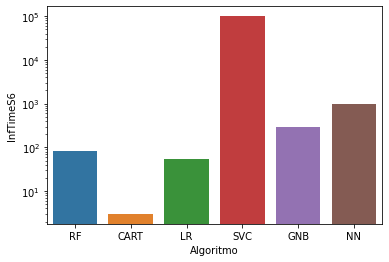

In [74]:
columns = ['InfTime', 'InfTimeS3', 'InfTimeS6']
elem = columns[choosenIndex]
csv = read_csv("InfTimeReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv[elem])
g.set_yscale("log")
plt.ylabel(columns[choosenIndex])
plt.show()


# Memoria occupata

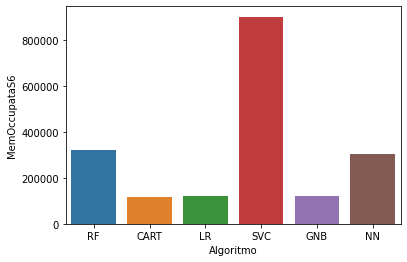

In [75]:
columns = ['MemOccupata', 'MemOccupataS3', 'MemOccupataS6']
elem = columns[choosenIndex]
csv = read_csv("MemOccupationReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv[elem])
plt.ylabel(elem)
plt.show()